In [116]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import analyze

In [119]:
state_data = pd.read_csv("data/states-daily.csv")

In [120]:
state_data.head()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked
0,20200324,AK,36.0,986.0,NaN,0.0,NaN,1022,2020-03-24T20:00:00Z
1,20200324,AL,215.0,2106.0,NaN,NaN,0.0,2321,2020-03-24T20:00:00Z
2,20200324,AR,218.0,947.0,0.0,22.0,0.0,1165,2020-03-24T20:00:00Z
3,20200324,AS,0.0,NaN,NaN,NaN,0.0,0,2020-03-24T20:00:00Z
4,20200324,AZ,357.0,313.0,22.0,8.0,5.0,692,2020-03-24T20:00:00Z


In [159]:
single_state_cases = state_data[state_data.state.eq("NY")].sort_values("date")
single_state_cases = single_state_cases[single_state_cases.hospitalized.notna()]

In [160]:
days = single_state_cases.date.to_numpy() - 20200000
cases = single_state_cases.hospitalized.to_numpy()

[321 322 323 324]
[1603. 1974. 2635. 3234.]


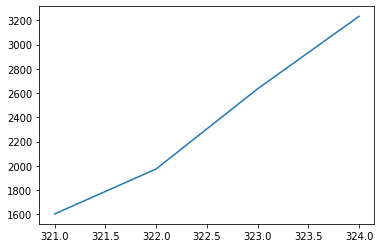

In [161]:
print(days)
print(cases)
pl = plt.plot(days, cases)

In [162]:
model = analyze.ExponentialGrowthRateEstimator()
model.fit(day=days, cases=cases)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                    3
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33.625
Date:                Tue, 24 Mar 2020   Deviance:                       42.929
Time:                        23:55:49   Pearson chi2:                     44.3
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.9481      9.909     -6.252      0.000     -81.369     -42.527
x1             0.2112      0.031      6.889      0.000       0.151       0.271
==============================================================================
"""

In [165]:
print(model.growth_rate())
print(model.growth_rate_confint())
print(model.fitted_glm.mu)
print(np.diff(cases))

0.23521290519393911
(0.16316123164766982, 0.3117277980425437)
[433.66543134 535.66913732 661.66543134]
[371. 661. 599.]


This is to see which states have a substantial amount of death data. The `(date, count)` column contains the number of days where the number of deaths is > 10.

In [126]:
state_data[state_data.death.notna() & state_data.death.ge(10)].groupby(['state']).agg(['count']).sort_values(('date', 'count'), ascending=False)

,date,positive,negative,pending,hospitalized,death,total,dateChecked
,count,count,count,count,count,count,count,count
state,,,,,,,,
WA,14,14,14,0,0,14,14,14
CA,8,8,8,2,0,8,8,8
NY,7,7,7,0,4,7,7,7
GA,6,6,6,0,0,6,6,6
FL,5,5,5,5,4,5,5,5
LA,5,5,5,0,1,5,5,5
NJ,5,5,5,5,0,5,5,5
CT,2,2,2,0,2,2,2,2


Similarly, we can look at the number of days where the hospitalizations is not NA.

In [96]:
state_data[state_data.hospitalized.notna()].groupby(['state']).agg(['count']).sort_values(('date', 'count'), ascending=False)

,date,positive,negative,pending,hospitalized,death,total,dateChecked
,count,count,count,count,count,count,count,count
state,,,,,,,,
AK,3,3,3,0,3,0,3,3
MA,3,3,3,0,3,3,3,3
VA,3,3,3,0,3,3,3,3
OK,3,3,3,3,3,3,3,3
OH,3,3,3,0,3,3,3,3
NY,3,3,3,0,3,3,3,3
ND,3,3,3,0,3,3,3,3
WV,3,3,3,3,3,3,3,3
